In [1]:
from pyportfolio import PyPortfolio
import matplotlib.pyplot as plt

/Users/paopao_ch/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
stock_tickers = [  # Some random tickers to demonstrate the class usage
    "D05.SI",
    "O39.SI",
    "Z74.SI",
    "G07.SI",
    "C07.SI",
    "S58.SI",
    "C09.SI",
    "K71U.SI",
    "HMN.SI",
    "E5H.SI",
    "NS8U.SI",
]
portfolio = PyPortfolio(stock_tickers)

/Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.content)
/Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_rf = pd.read_html(table_html)[0]
[*********************100%************

In [3]:
portfolio.info.head(38)

,Ticker,Company,Sector,Market Cap (B SGD),10-Y Return(%)
0,D05.SI,DBS Group Holdings Ltd,Financial Services,110.922629,193.501118
1,O39.SI,Oversea-Chinese Banking Corporation Limited,Financial Services,67.953623,98.344990
2,Z74.SI,Singapore Telecommunications Limited,Communication Services,52.347478,4.596111
3,G07.SI,Great Eastern Holdings Limited,Financial Services,12.211630,23.720407
4,C07.SI,Jardine Cycle & Carriage Limited,Industrials,10.750420,16.059908
5,S58.SI,SATS Ltd.,Industrials,5.486797,12.907533
6,C09.SI,City Developments Limited,Real Estate,4.663558,-18.904443
7,K71U.SI,Keppel REIT,Real Estate,3.582864,32.140235
8,HMN.SI,CapitaLand Ascott Trust,Real Estate,3.582977,50.533071
9,E5H.SI,Golden Agri-Resources Ltd,Consumer Defensive,3.614285,-38.020207


In [4]:
portfolio.data.head()

Ticker,C07.SI,C09.SI,D05.SI,E5H.SI,G07.SI,HMN.SI,K71U.SI,NS8U.SI,O39.SI,S58.SI,Z74.SI
Date,,,,,,,,,,,
2014-01-02 00:00:00+00:00,24.551661,8.091949,9.883746,0.409968,13.679793,0.618760,0.659174,0.187552,6.164503,2.424310,2.361465
2014-01-03 00:00:00+00:00,24.259211,7.947451,9.814383,0.406241,13.533935,0.616203,0.659174,0.187552,6.067613,2.409252,2.322752
2014-01-06 00:00:00+00:00,24.334026,7.938951,9.837506,0.413695,13.587672,0.616203,0.656381,0.184773,5.976781,2.394195,2.284039
2014-01-07 00:00:00+00:00,24.599268,7.904949,9.849066,0.406241,13.556965,0.623874,0.650795,0.184773,5.904116,2.386665,2.284039
2014-01-08 00:00:00+00:00,24.823696,8.057948,10.039804,0.406241,13.541609,0.621317,0.656381,0.188941,5.910171,2.424310,2.290491


In [5]:
results, weights = portfolio.run_monte_carlo_simulation(num_portfolios=100000)

100%|██████████| 100000/100000 [00:02<00:00, 33754.00it/s]


In [6]:
min_vol_weights, min_vol_returns, min_vol_std = portfolio.get_lowest_vol_port()
min_vol_weights

array([ 0.00276356, -0.04283307,  0.01283982,  0.01148342,  0.4243514 ,
        0.06153145,  0.14597395,  0.00541545,  0.13991064,  0.04410195,
        0.19446142])

In [7]:
optimal_weights, optimal_returns, optimal_std = portfolio.get_optimise_port()
optimal_weights

array([ 0.03299009, -1.72268484,  4.5046408 , -0.30801884, -0.95827495,
        0.81194045,  0.29603041, -0.28616803,  0.52432488, -0.11149318,
       -1.78328679])

In [8]:
diverse_weights, diverse_returns, diverse_std = portfolio.get_risk_free_port()
diverse_weights

array([ 0.02969108, -1.55041636,  4.05417672, -0.27721696, -0.86244745,
        0.7307464 ,  0.26642737, -0.25755123,  0.47189239, -0.10034387,
       -1.60495811,  0.1       ])

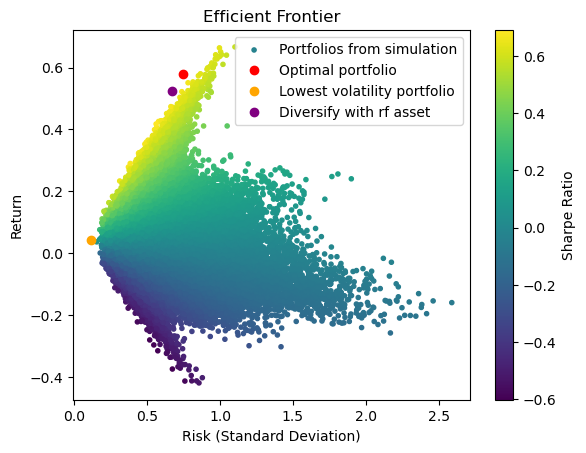

In [9]:
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='.', label="Portfolios from simulation")
plt.plot(optimal_std, optimal_returns, 'o', markersize=6, color="red", label="Optimal portfolio")
plt.plot(min_vol_std, min_vol_returns, 'o', markersize=6, color="orange", label="Lowest volatility portfolio")
plt.plot(diverse_std, diverse_returns, 'o', markersize=6, color="purple", label="Diversify with rf asset")
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.legend()
plt.show()